In [1]:
import warnings
#warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
print(pd.__version__)

0.24.2


In [3]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.13.1


In [4]:
import numpy as np
from sklearn import svm

In [32]:
!curl -o https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1556553567&period2=1559145567&interval=1d&events=history&crumb=MaRgy.XF7uO

In [31]:
df = pd.read_csv('./AAPL.csv', sep=',')
print(df.columns)

days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
date_to_day = lambda x : sum(days[:int(x[0])-1]) + int(x[1])

dates = [int(date_to_day(d.split('-')[1:])) for d in df['Date']]
dates = np.reshape(dates, (len(dates),1))
prices = [float(p) for p in df['Open']]

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [6]:
svr_lin = svm.SVR(kernel='linear', C=1e3)
svr_poly = svm.SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)

svr_lin.fit(dates, prices)
svr_poly.fit(dates, prices)
svr_rbf.fit(dates, prices)

/home/hanky/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Populating the interactive namespace from numpy and matplotlib


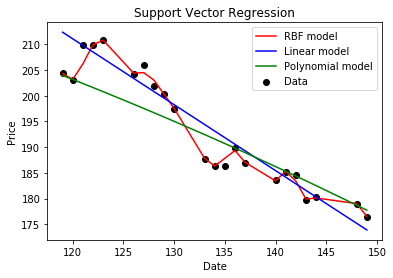

In [7]:
#show plot
%matplotlib inline
%pylab inline
from matplotlib import pyplot as plt
plt.scatter(dates, prices, color='black', label='Data')
plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
plt.plot(dates, svr_lin.predict(dates), color='blue', label='Linear model')
plt.plot(dates, svr_poly.predict(dates), color='green', label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [29]:
x_ = np.array([149, 150, 151], dtype=int) 
svr_rbf.predict(np.reshape(x_, (len(x_), 1)))

array([176.51993768, 178.86877722, 183.89106346])